In [2]:
import numpy as np
import pandas as pd

import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.set_printoptions(suppress=True)

%reload_ext autoreload
%autoreload 2

In [3]:
from clonaltrans import pl, utils
import os

### Fit (real data) with constant K no var L2Norm

In [4]:
path = './realdatas/rawdata_const_novar_l2norm.pt'
model = torch.load(path)
device = torch.device(f"cuda:{model.config.gpu}")

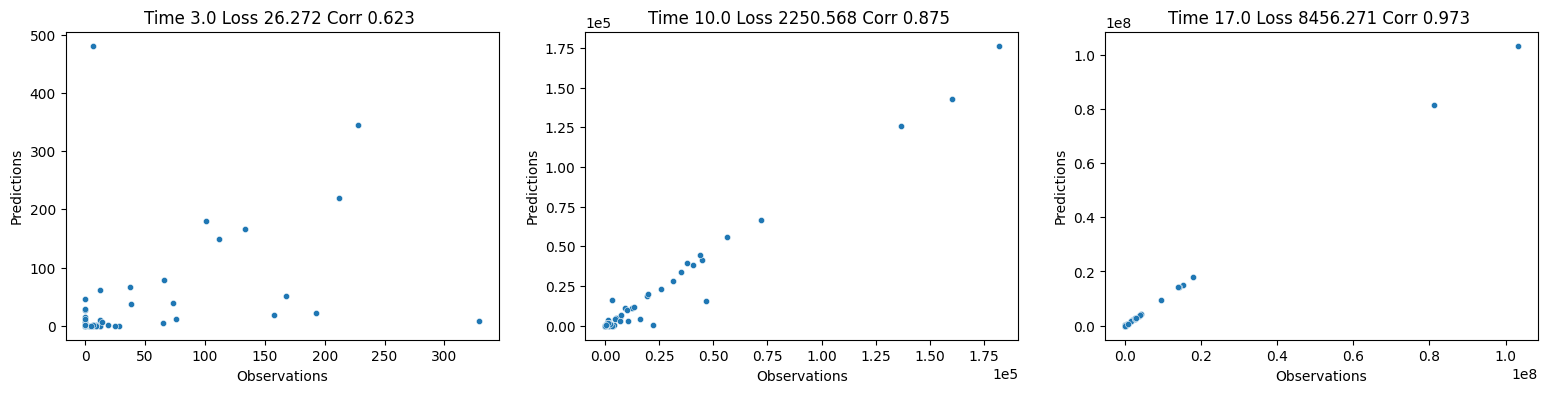

In [5]:
t_observed = torch.tensor([0.0, 3.0, 10.0, 17.0]).to(device)
predictions = model.eval_model(t_observed, log_output=False)

save = 'eval_' + os.path.split(path)[1]
pl.mse_corr(model.N, torch.pow(predictions, 4), t_observed, save=False, sample_N=torch.ones(model.N.shape))

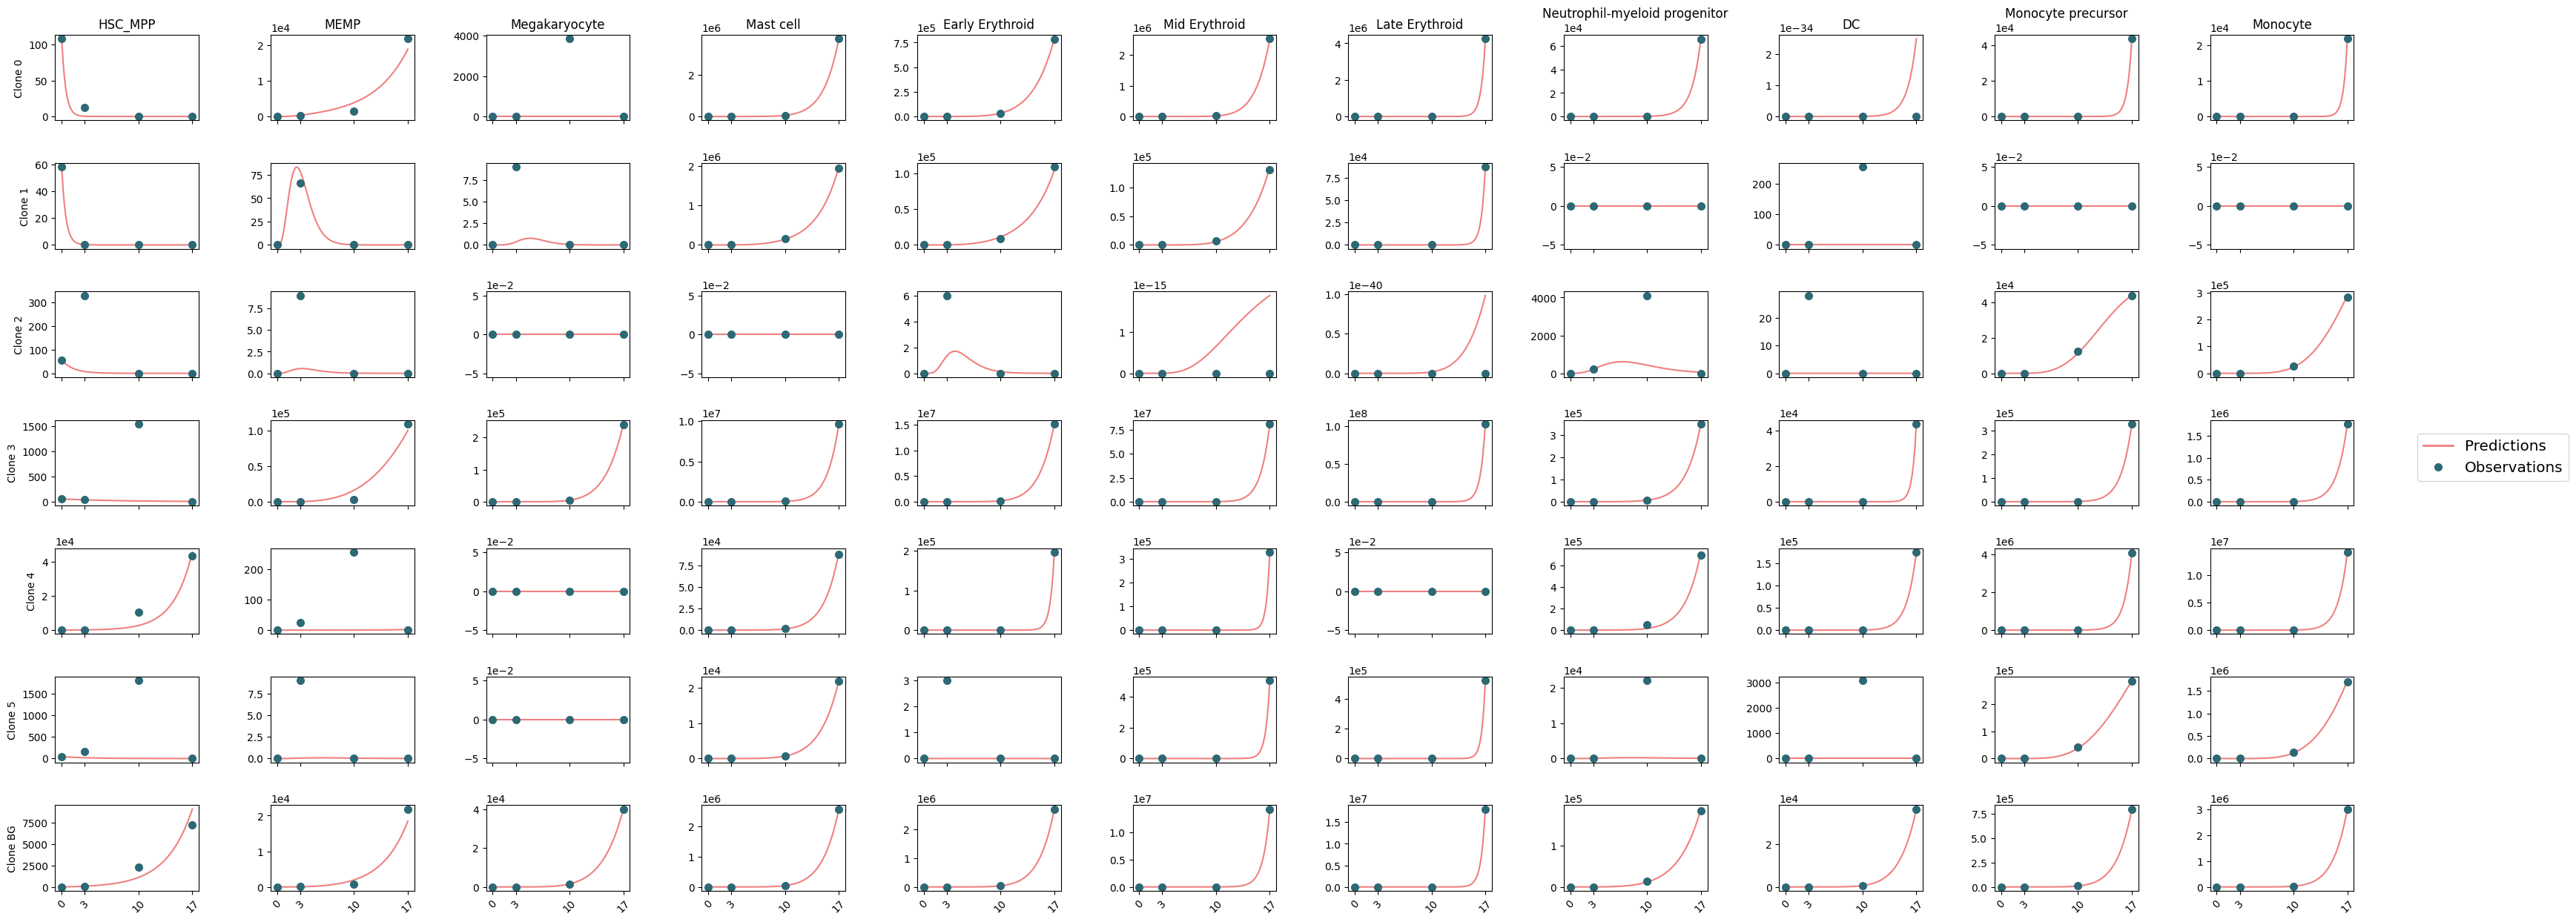

In [6]:
pl.grid_visual_interpolate(
    model,
    raw_data=True,
    save=False,
)

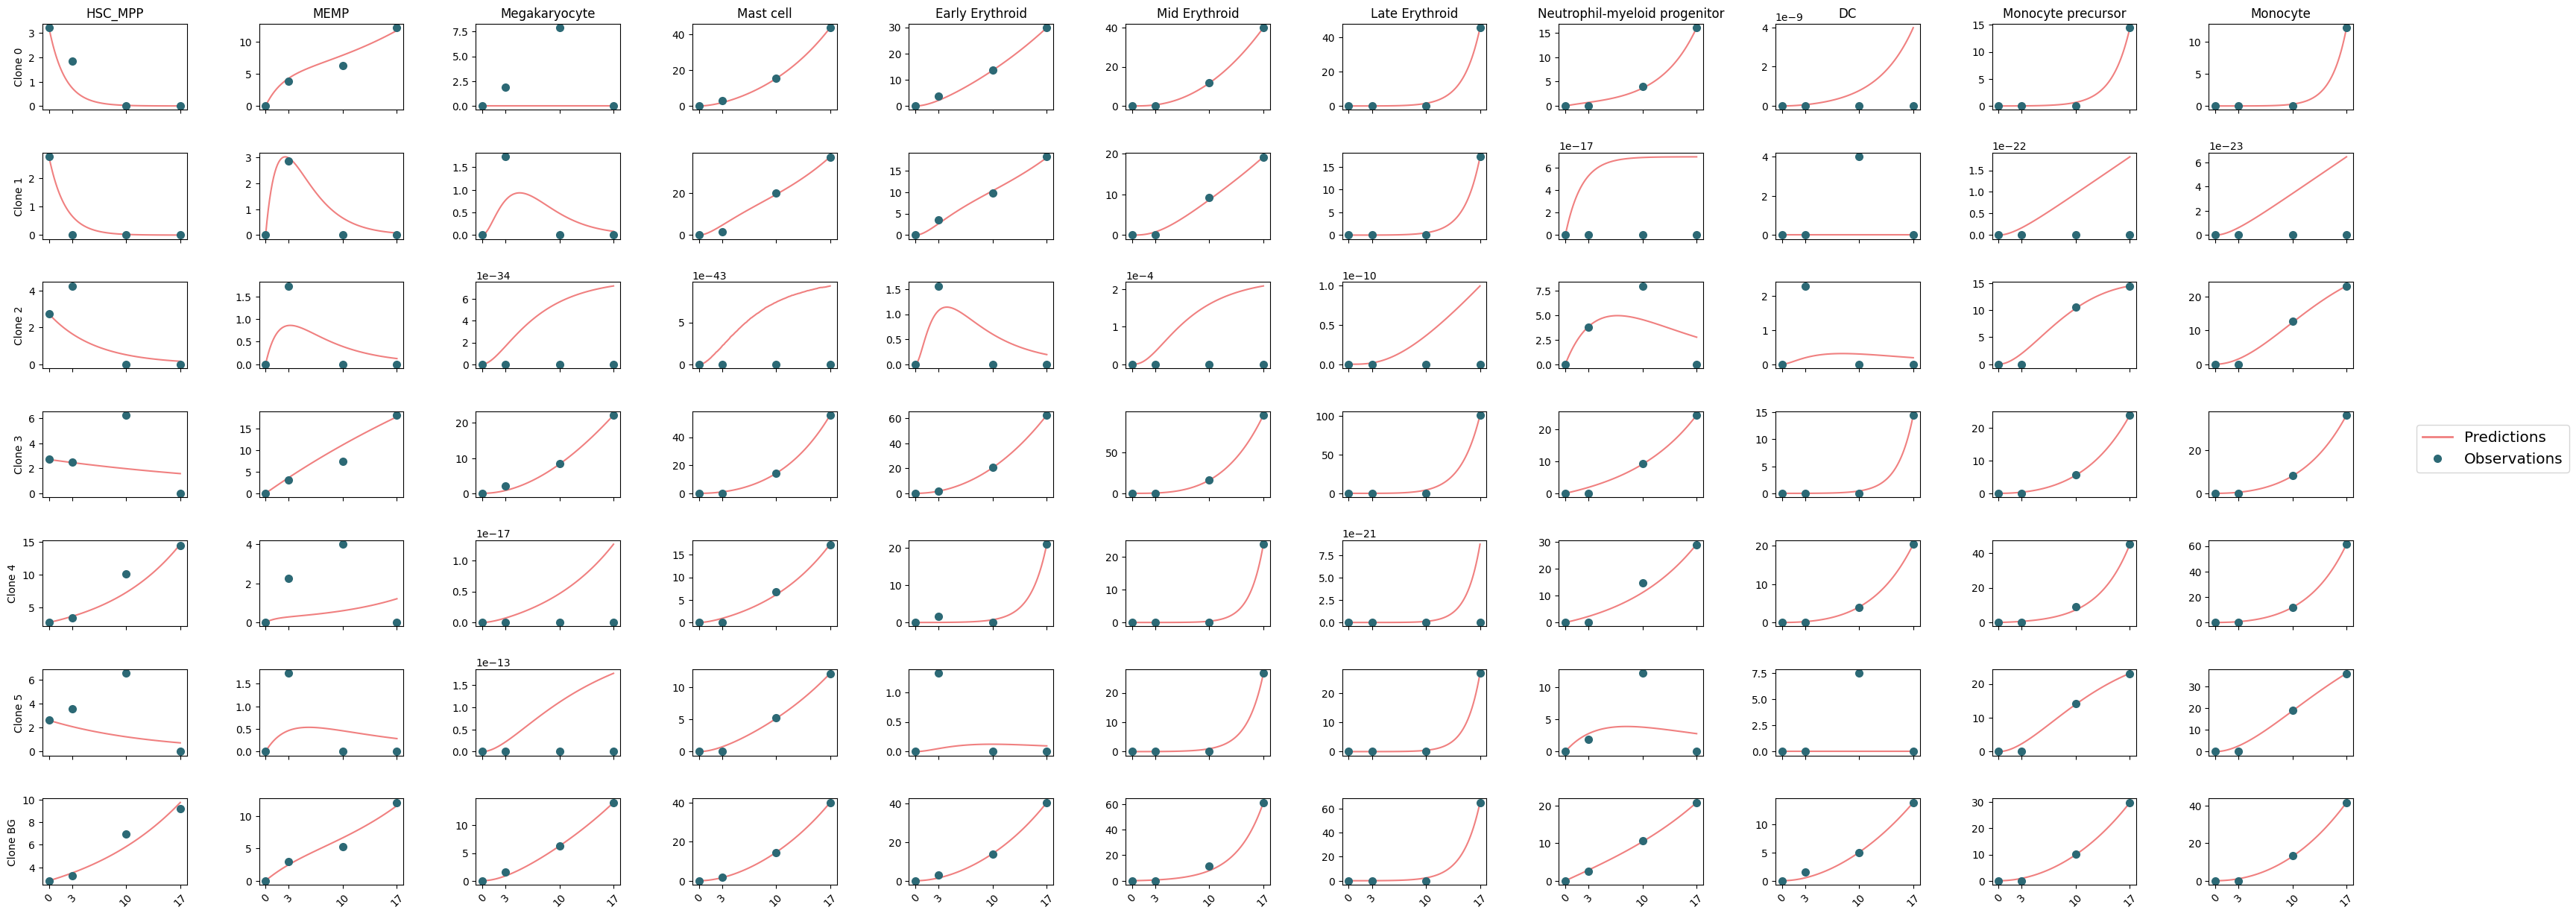

In [7]:
pl.grid_visual_interpolate(
    model,
    raw_data=False,
    save=False,
)

(154,)


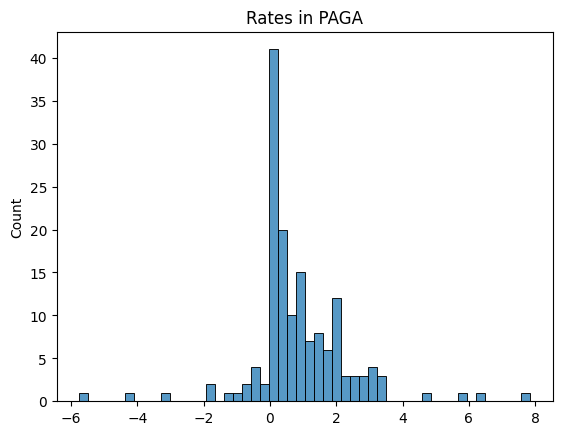

In [10]:
K_total = pl.rates_in_paga(model, 'const', value=True)
print (K_total.shape)

(33,)


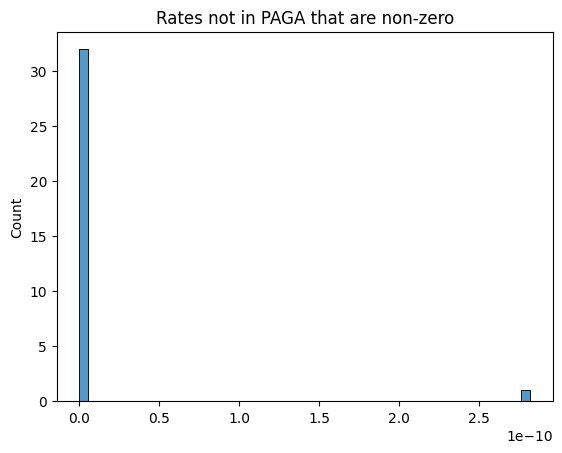

In [11]:
K_total = pl.rates_notin_paga(model, 'const', value=True)
print (K_total.shape)

### Fit (real data) with K(t) no var L2Norm

In [3]:
path = './realdatas/rawdata_dynamic_novar_l2normext3.pt'
model = torch.load(path)
device = torch.device(f"cuda:{model.config.gpu}")

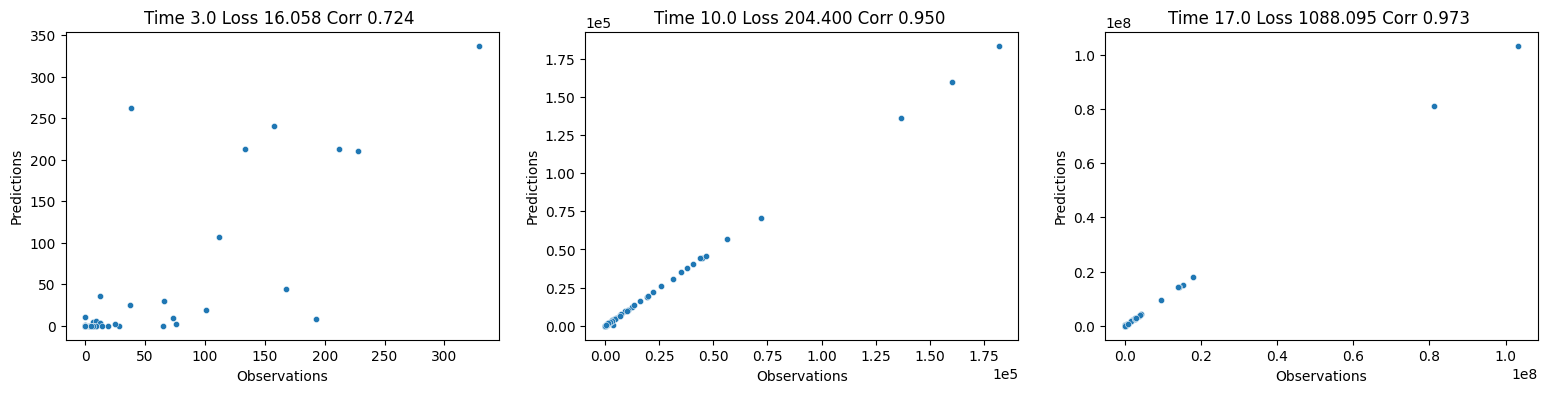

In [4]:
t_observed = torch.tensor([0.0, 3.0, 10.0, 17.0]).to(device)
predictions = model.eval_model(t_observed, log_output=False)

save = 'eval_' + os.path.split(path)[1]
pl.mse_corr(model.N, torch.pow(predictions, 4), t_observed, save=False, sample_N=torch.ones(model.N.shape))

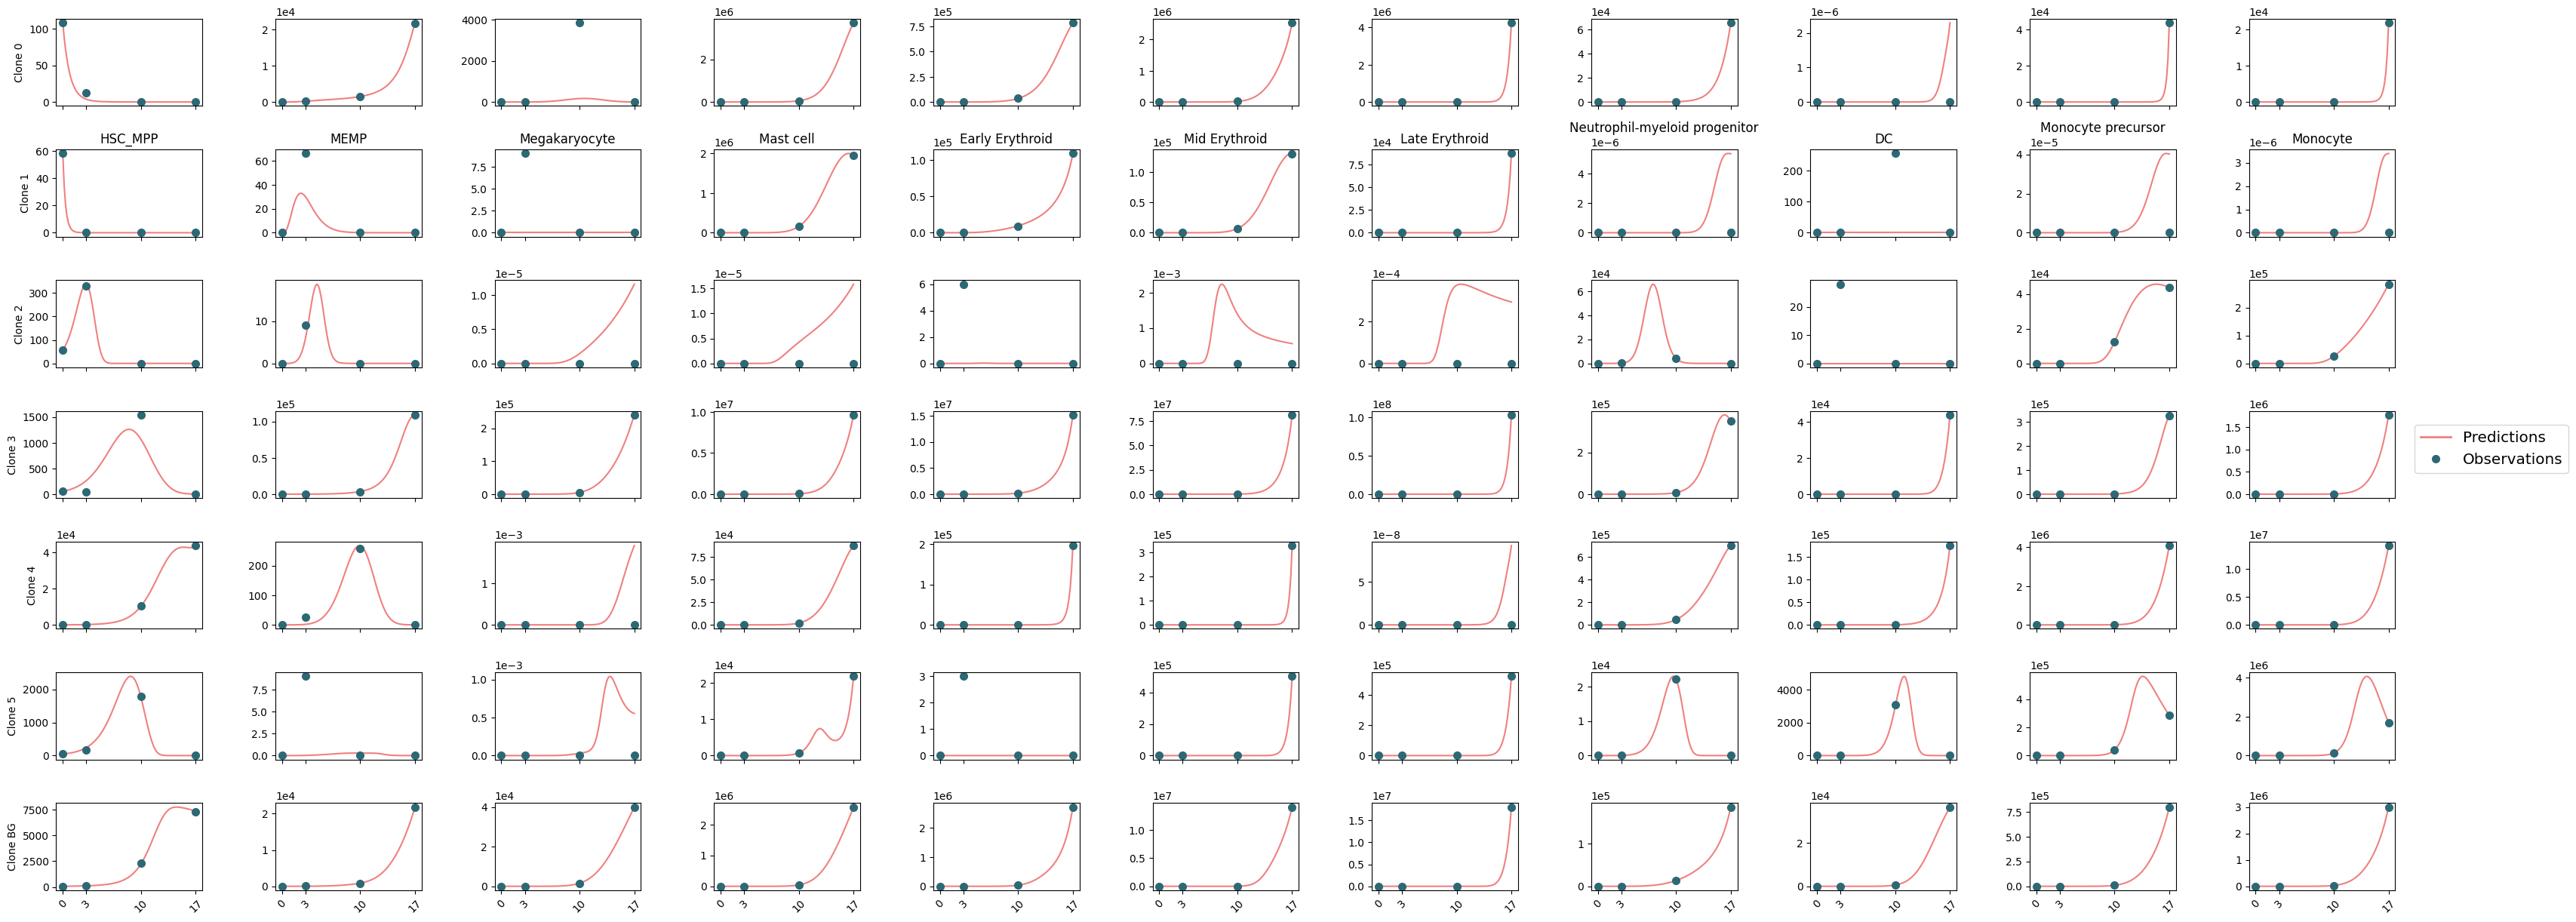

In [23]:
pl.grid_visual_interpolate(
    model,
    raw_data=True,
    save='dynaKnovarl2normext3row12',
)

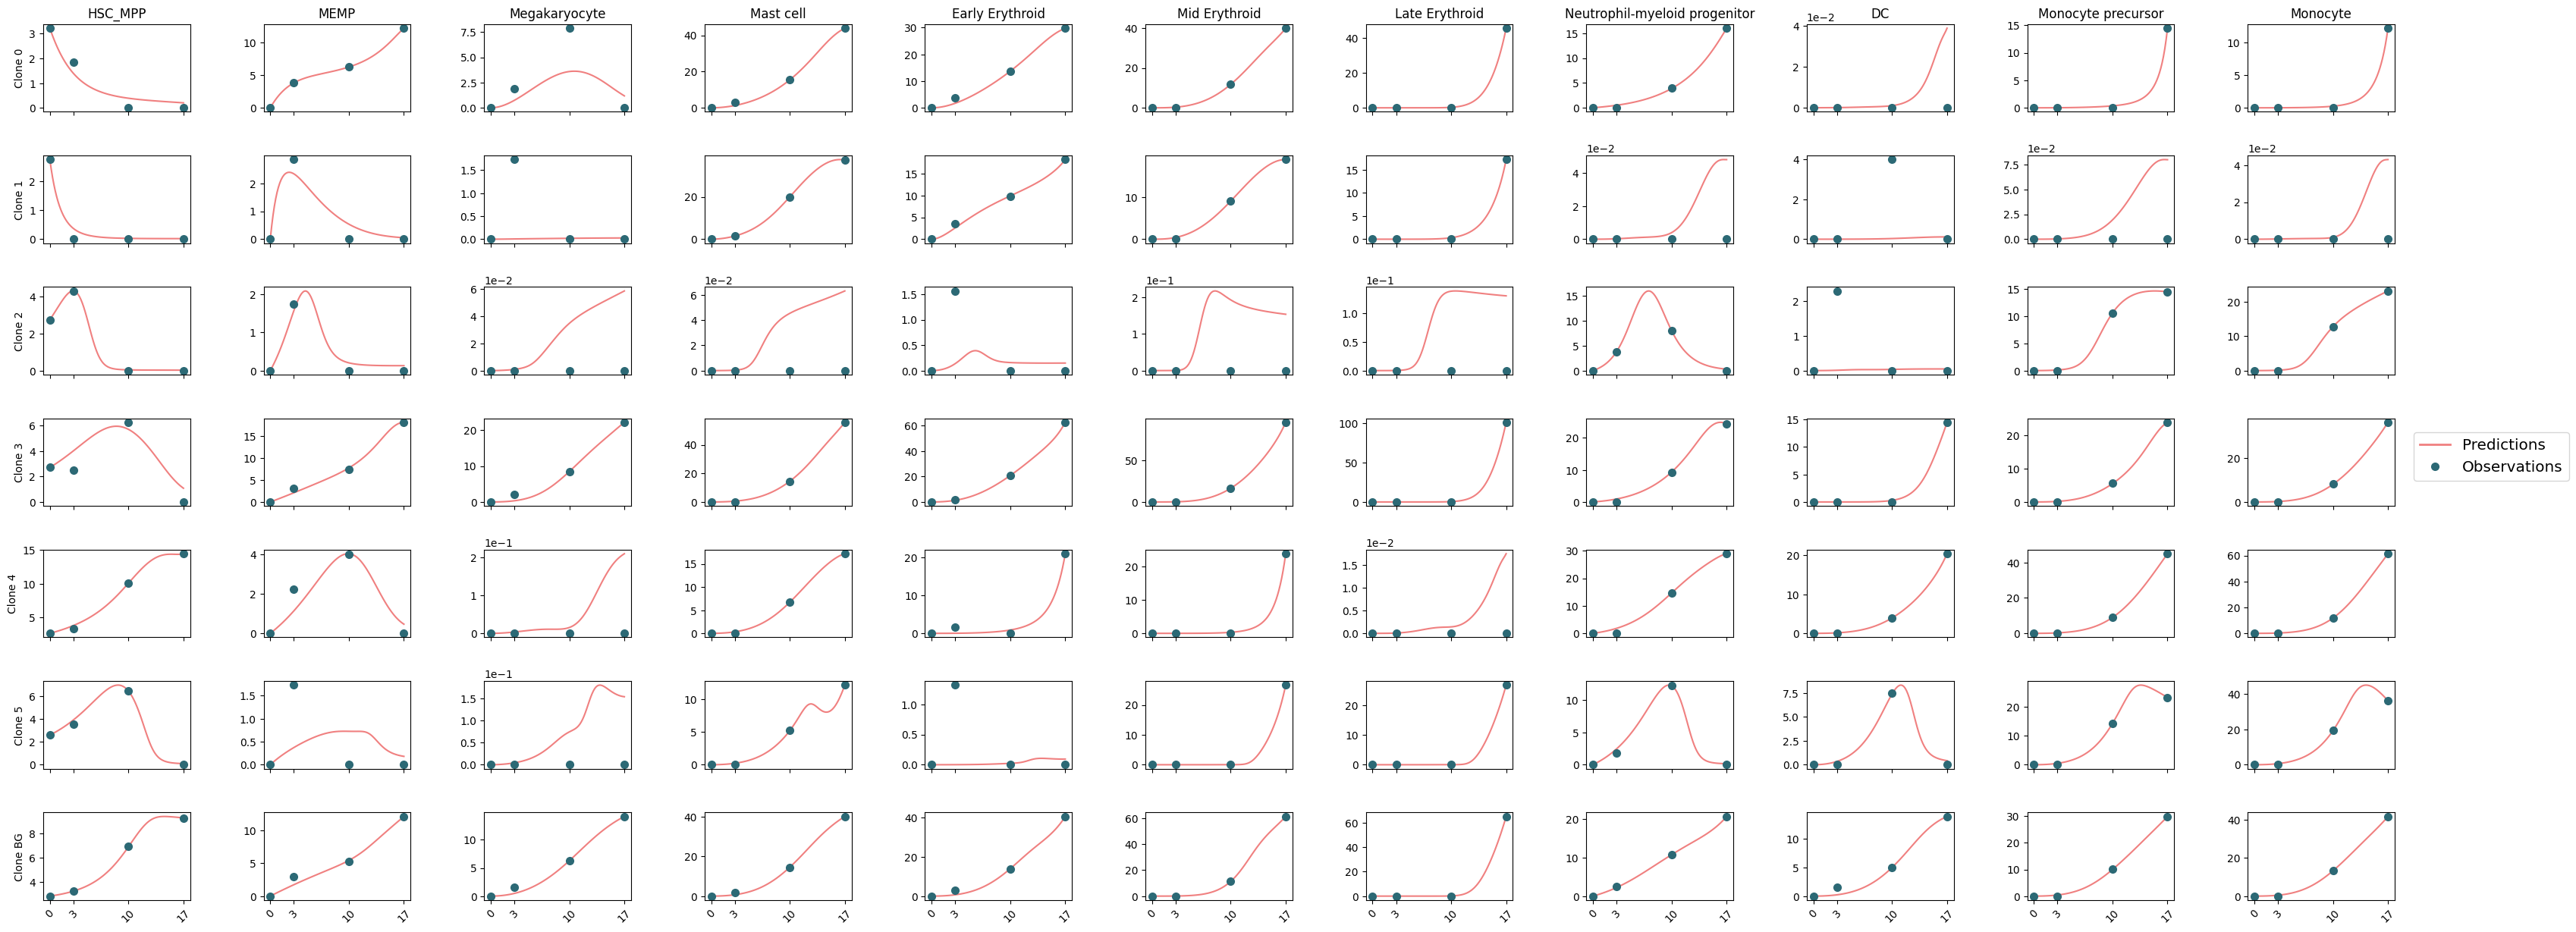

In [19]:
pl.grid_visual_interpolate(
    model,
    raw_data=False,
    save='dynaKnovarl2normrawext3',
)

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


(35, 154)


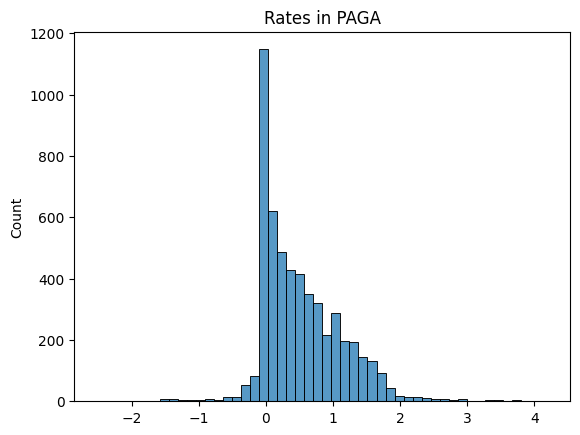

In [14]:
K_total = pl.rates_in_paga(model, 'dynamic', value=True, save='ratesinpaga')
print (K_total.shape)

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


(35, 44)


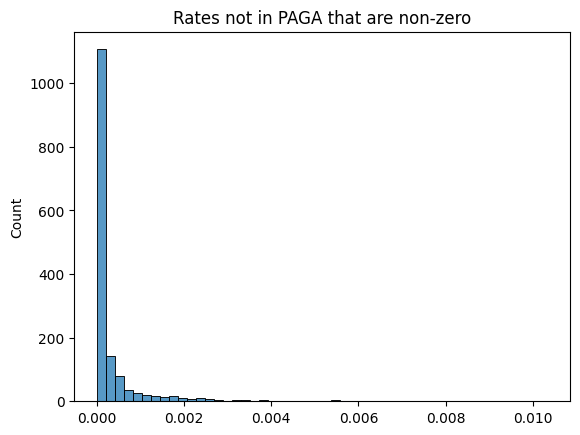

In [17]:
K_total = pl.rates_notin_paga(model, 'dynamic', value=True, save='ratesnotinpaga')
print (K_total.shape)

In [ ]:
pl.clone_dynamic_K(model, 'dynamic', index_clone=2, suffix='DynL2Normext3')

In [ ]:
pl.clone_dynamic_K(model, 'dynamic', index_clone=1, suffix='DynL2Normext3')

### Bootstrappping

In [3]:
path = './realdatas/rawdata_dynamic_novar_l2normext3.pt'
dyna = torch.load(path)

In [4]:
model_list = []
import os
for name in os.listdir('./tempnorm/'):
    model_list.append(torch.load(f'./tempnorm/{name}'))
print (len(model_list))

177


In [5]:
for idx, model in enumerate(model_list):
    if idx >= 5 and idx <= 10:
        t_observed = torch.tensor([0.0, 3.0, 10.0, 17.0]).to('cpu')
        model.input_N = model.input_N.to('cpu')
        predictions = model.eval_model(t_observed, log_output=False)

        save = 'eval_' + os.path.split(path)[1]
        pl.mse_corr(model.N, torch.pow(predictions, 4), t_observed, 
                    save=False, sample_N=model.sample_N, verbose=True)

Time 3.0 Loss 2.746 Corr 0.616 Time 10.0 Loss 55.450 Corr 0.827 Time 17.0 Loss 503.612 Corr 0.941 
Time 3.0 Loss 12.212 Corr 0.807 Time 10.0 Loss 57.560 Corr 0.810 Time 17.0 Loss 1445.051 Corr 0.925 
Time 3.0 Loss 12.510 Corr 0.796 Time 10.0 Loss 104.654 Corr 0.917 Time 17.0 Loss 580.576 Corr 0.941 
Time 3.0 Loss 6.565 Corr 0.758 Time 10.0 Loss 64.156 Corr 0.820 Time 17.0 Loss 23454.295 Corr 0.941 
Time 3.0 Loss 8.510 Corr 0.452 Time 10.0 Loss 73.423 Corr 0.897 Time 17.0 Loss 2400.465 Corr 0.946 
Time 3.0 Loss 7.884 Corr 0.614 Time 10.0 Loss 75.785 Corr 0.911 Time 17.0 Loss 2273.338 Corr 0.925 


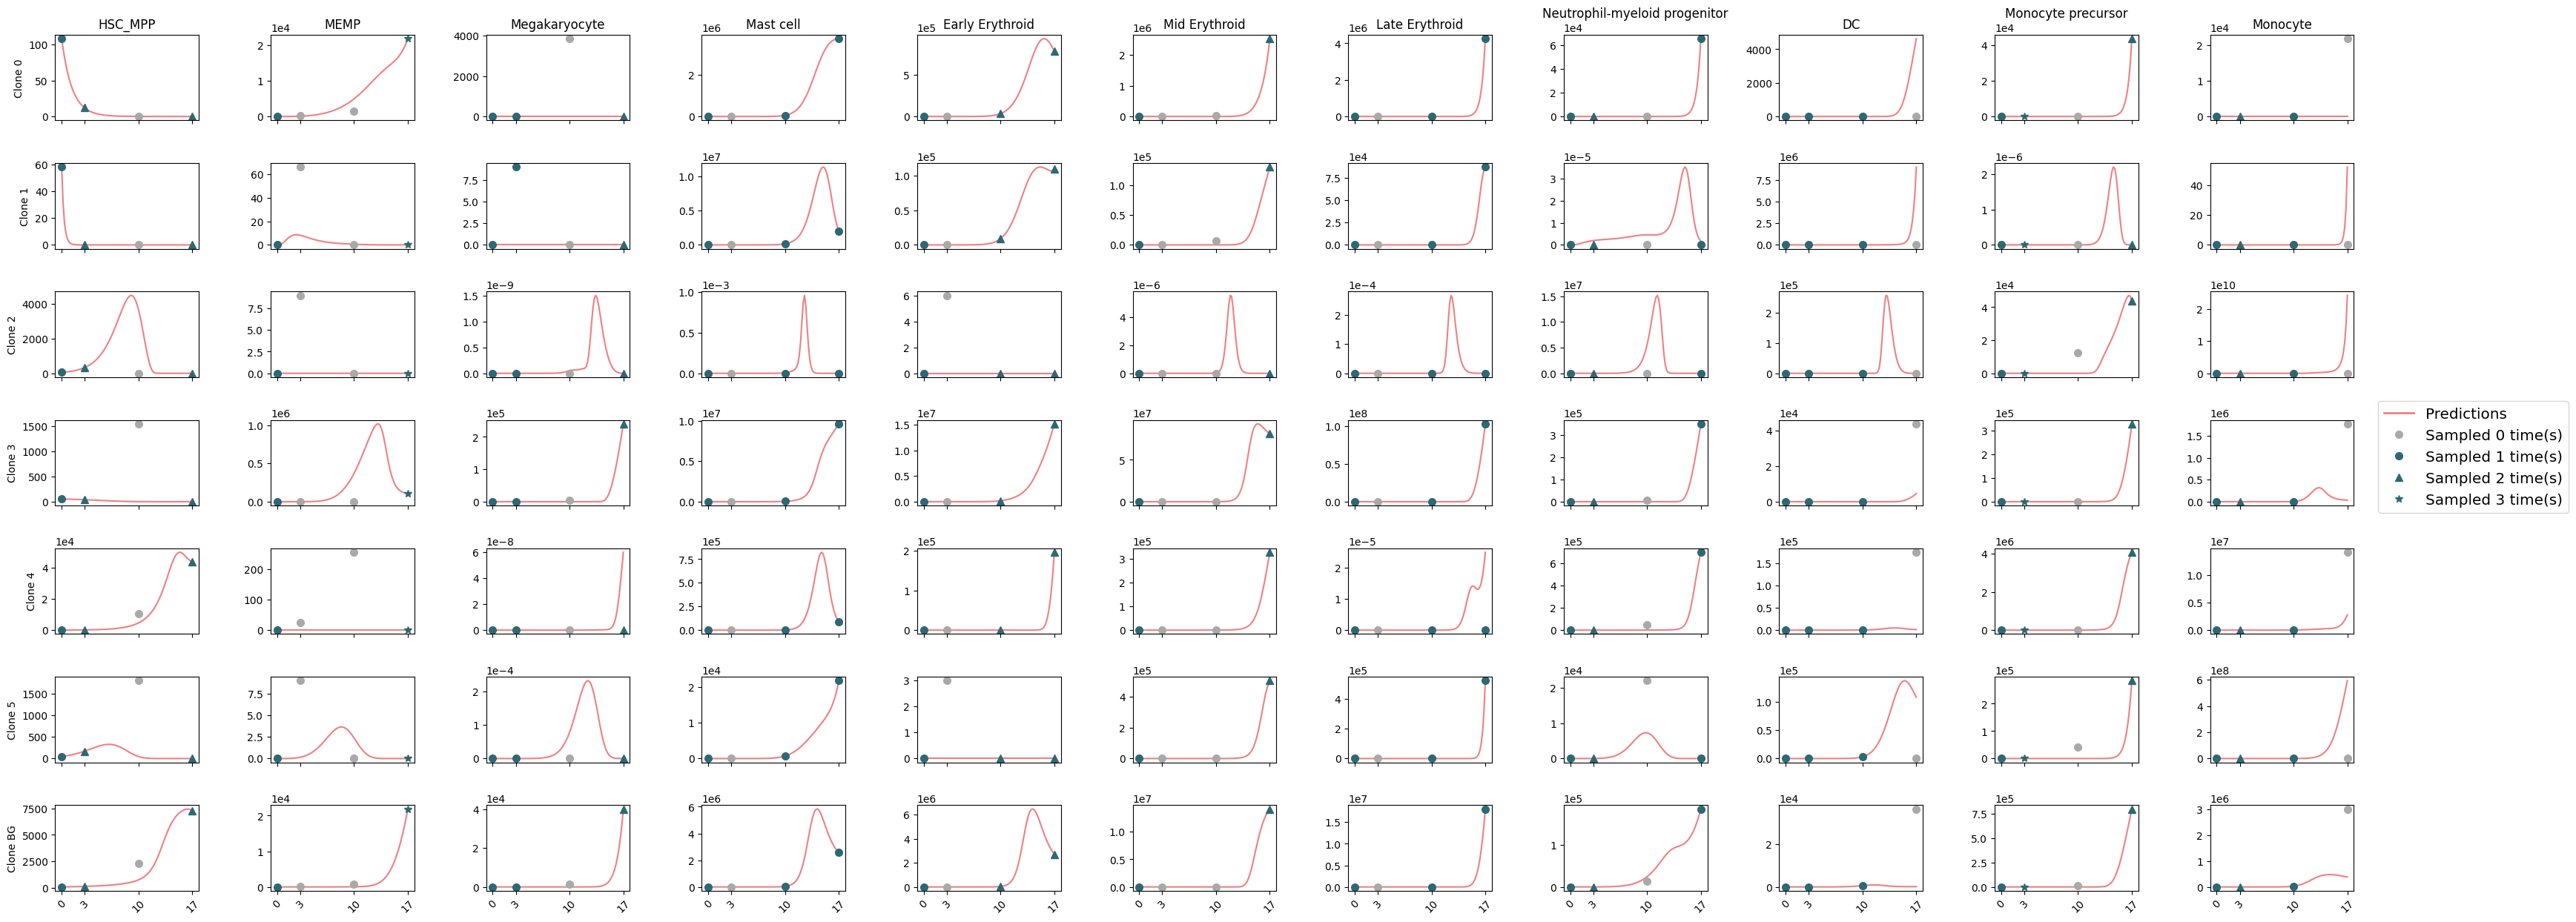

In [19]:
for idx, model in enumerate(model_list):
    if idx == 5:
        pl.grid_visual_interpolate(
            model,
            raw_data=True,
            save='bootexample'
        )

In [5]:
total_K, ref_K = pl.parameter_range(model_list, 'dynamic', 3.0, ref_model=dyna)

  0%|          | 0/177 [00:00<?, ?it/s]/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


100%|██████████| 177/177 [01:06<00:00,  2.68it/s]


In [21]:
pl.parameter_ci(total_K, dyna.data_dir, 1, pop_1=0, pop_2=1, ref_K=ref_K, save='1hscmemep')

In [23]:
pl.parameter_ci(total_K, dyna.data_dir, 1, pop_1=1, pop_2=4, ref_K=ref_K, save='1mempery')

In [25]:
pl.parameter_ci(total_K, dyna.data_dir, 2, pop_1=0, pop_2=0, ref_K=ref_K, save='2hsc')

In [30]:
pl.parameter_ci(total_K, dyna.data_dir, 2, pop_1=2, pop_2=2, ref_K=ref_K, save='2mega')

In [31]:
total_pred, obs, t_smoothed = pl.trajectory_range(model_list, dyna, raw_data=True)

0it [00:00, ?it/s]

178it [01:36,  1.84it/s]


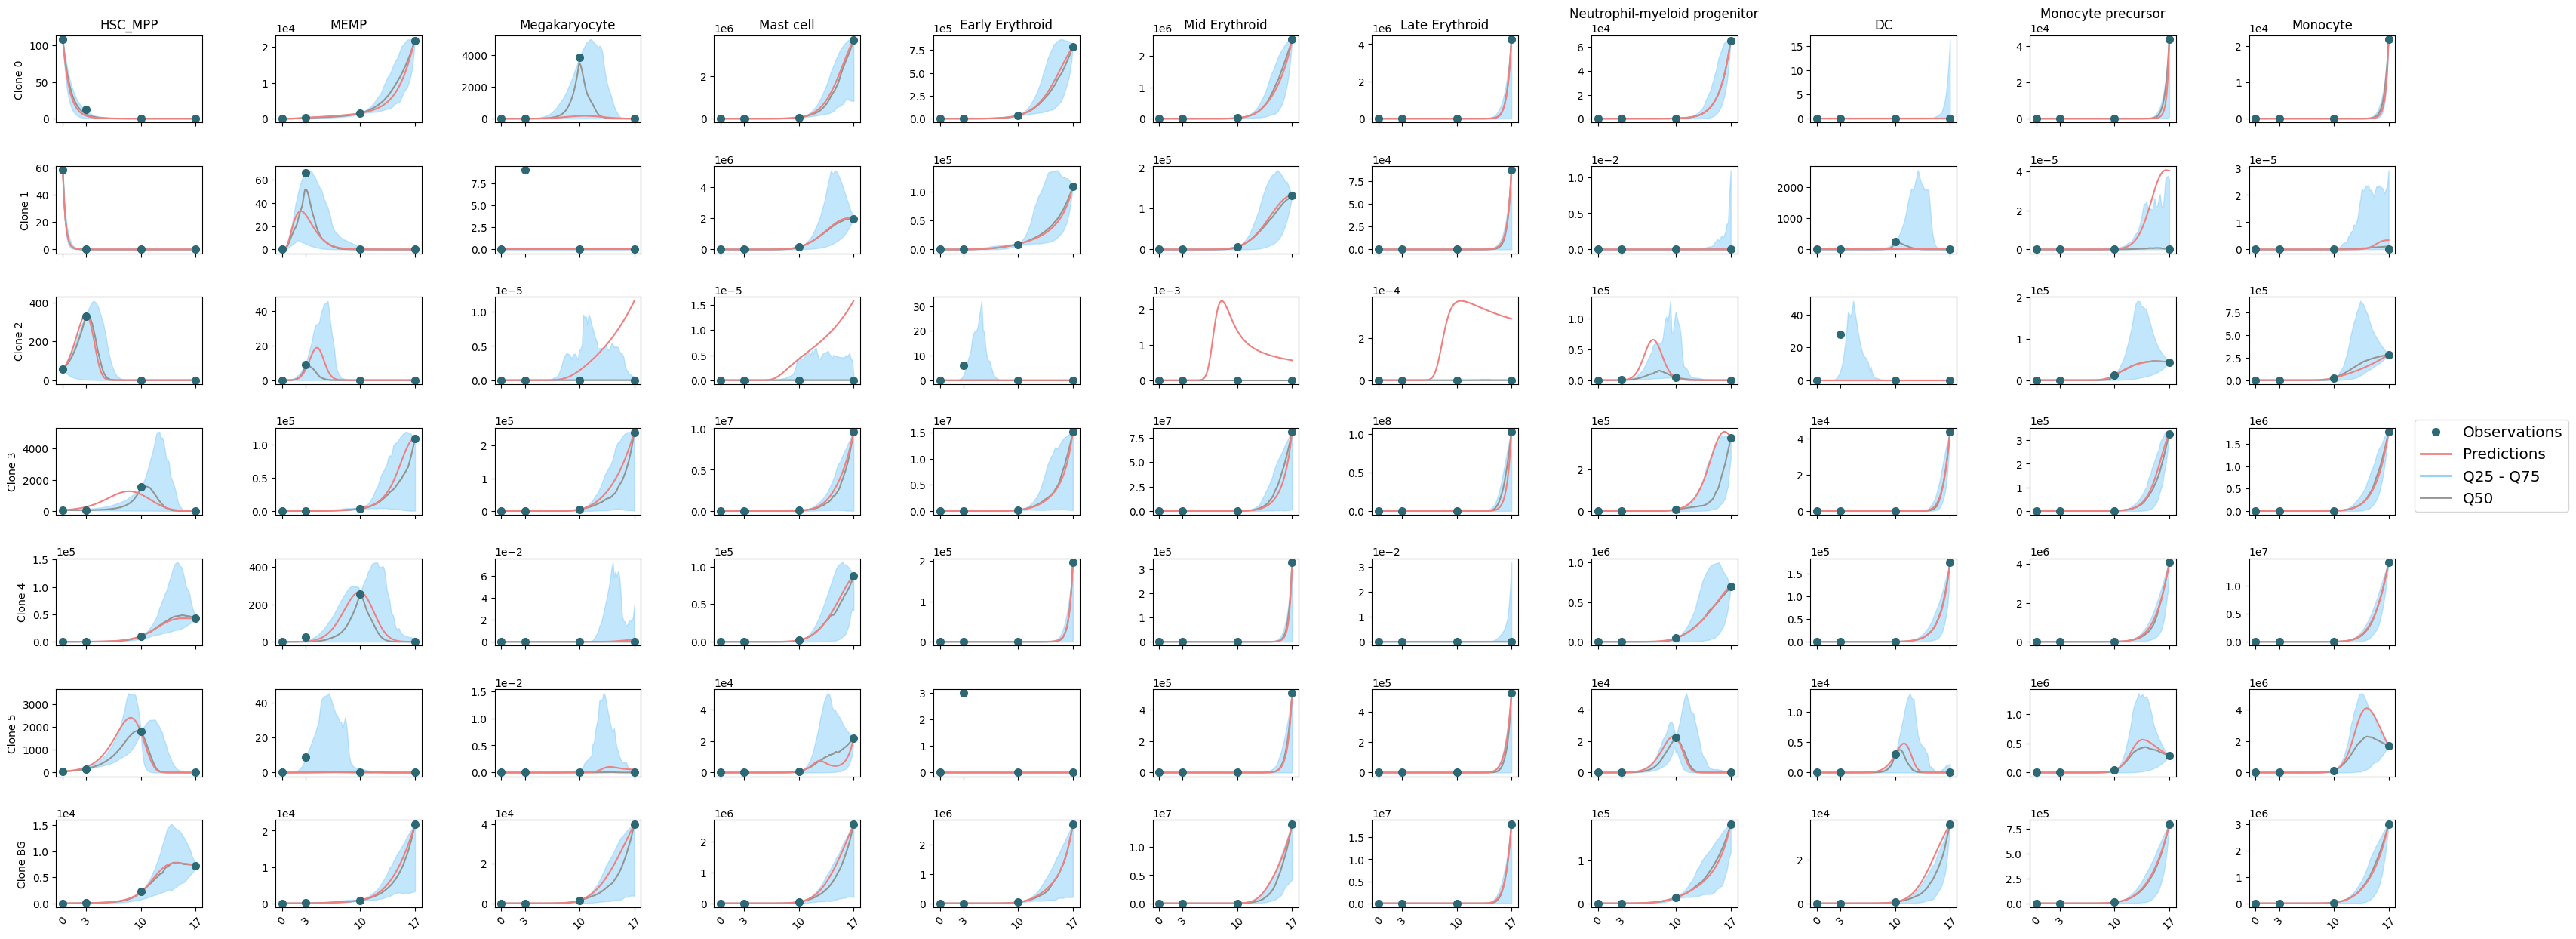

In [33]:
pl.trajectory_ci(total_pred, obs, t_smoothed, dyna, boundary=[25, 75], save='trajectoryci')

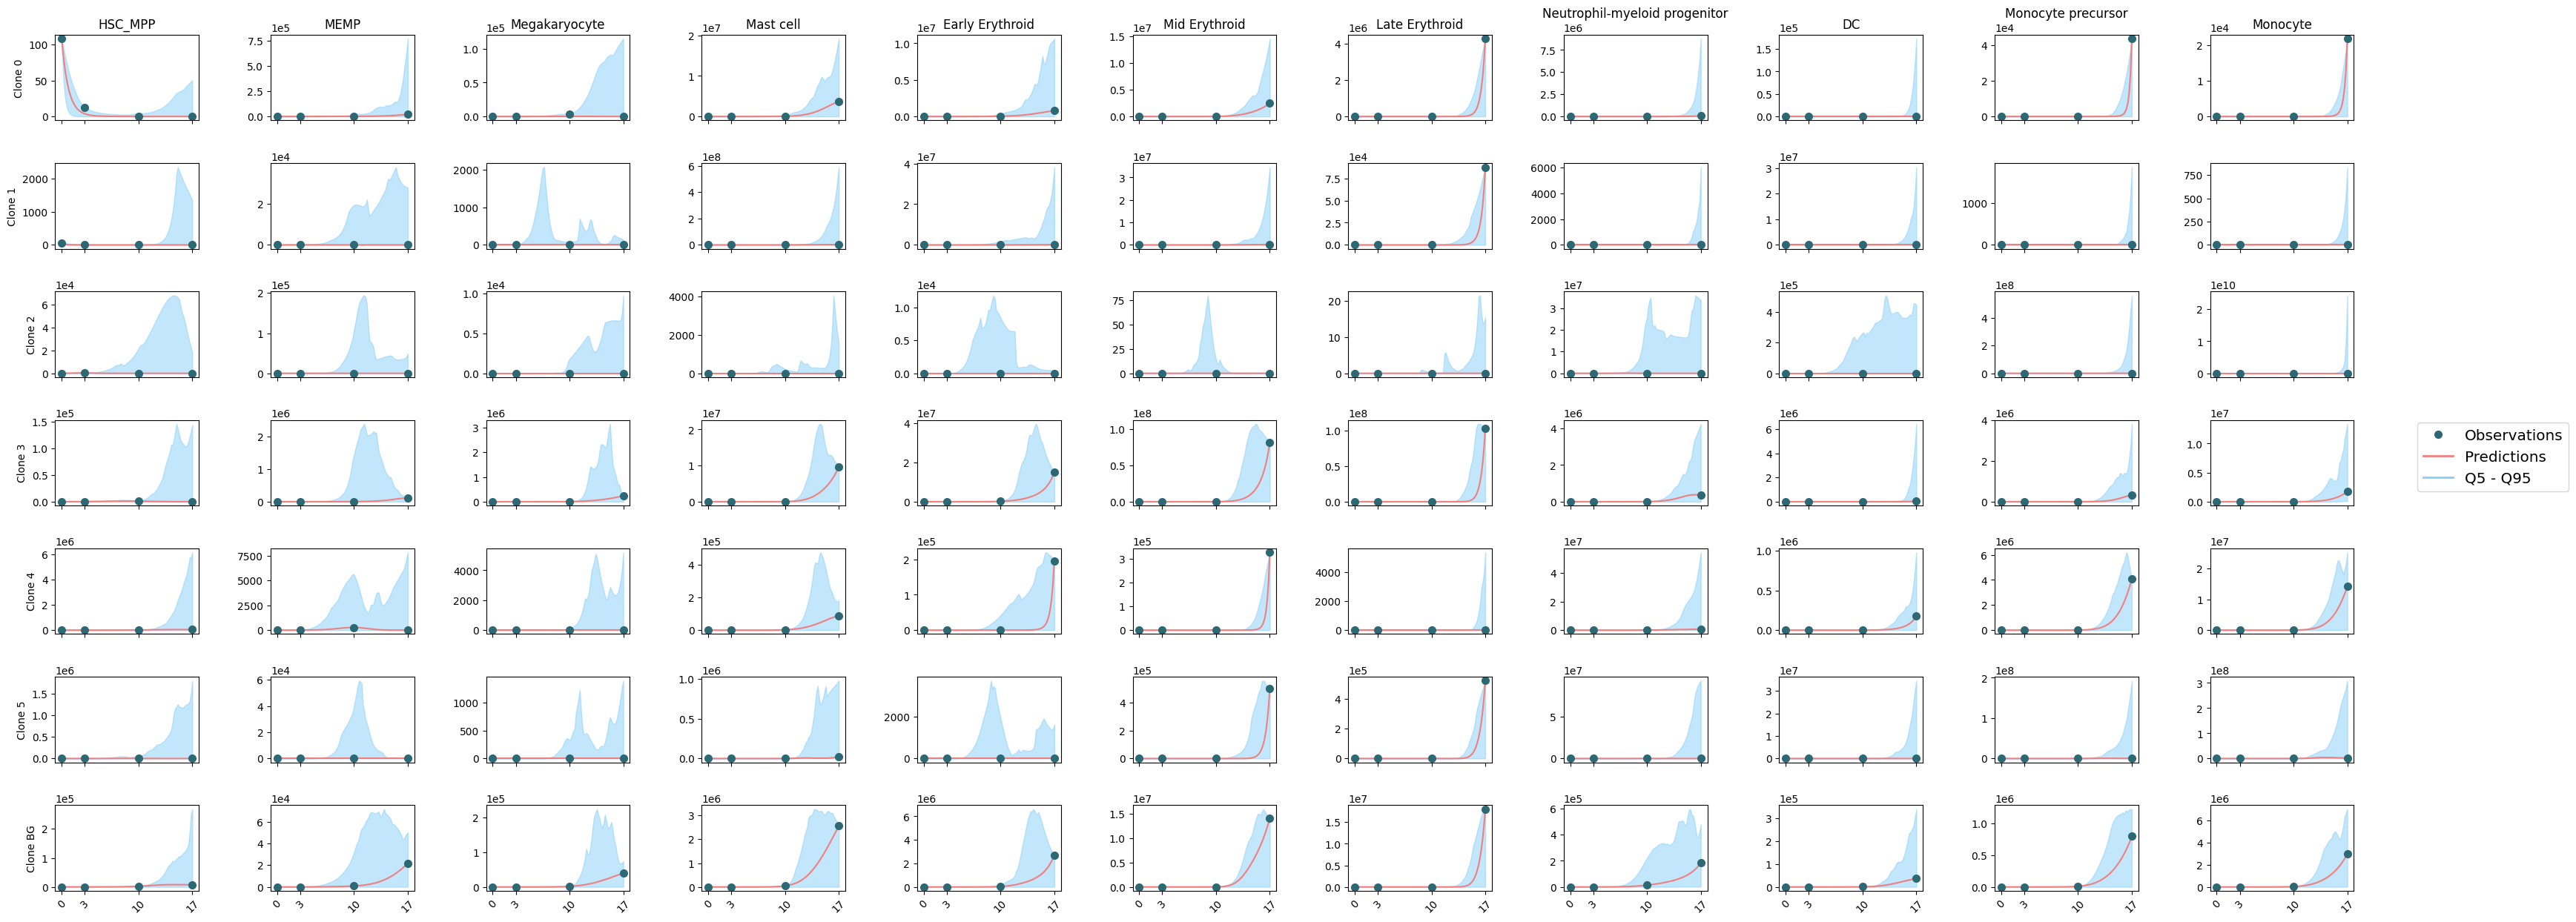

In [15]:
pl.trajectory_ci(total_pred, obs, t_smoothed, dyna, boundary=[5, 95])